# OS y Pathlib

En esta libreta hablaremos de la biblioteca `os`, que es súper útil para todo lo que tiene que ver con manejo de archivos y etc.

Aunque no tiene que ver con matemáticas necesariamente, muchas veces hay que hacer cosas como "renombrar 300 archivos, borrar los que contengan BLA, abrir todas las imágenes y borrar aquellas que no sirvan", etc. Si eso lo puedes hacer eficientemente, te quedará más tiempo para las matemáticas!

In [ ]:
from pathlib import Path

In [ ]:
path = Path("tmp/bla/ouch"); path

In [ ]:
path = Path("tmp/bla42.txt")

In [ ]:
type(path)

In [ ]:
str(path)

In [ ]:
path.exists()

In [ ]:
path.touch()

In [ ]:
path.exists()

In [ ]:
directorio = Path("/home/mraggi/Documents/imagenes_prueba/")

In [ ]:
archivo = directorio/"bcgot.png"

In [ ]:
archivo

In [ ]:
archivo.exists()

In [ ]:
archivo.parent

In [ ]:
archivo.name

In [ ]:
archivo.stem

In [ ]:
archivo.is_dir()

In [ ]:
directorio.is_dir()

In [ ]:
archivo.rename(directorio/"bla.png")

In [ ]:
archivo

In [ ]:
archivo.exists()

In [ ]:
archivo = directorio/"bla.png"

In [ ]:
archivo.exists()

In [ ]:
import os

In [ ]:
directorio

In [ ]:
os.listdir(directorio)

In [ ]:
for f in os.scandir(directorio):
    print(f)
    break

In [ ]:
list(os.scandir(directorio))

In [ ]:
p = list(os.scandir(directorio))[1]

In [ ]:
p

In [ ]:
type(p)

In [ ]:
type(archivo)

In [ ]:
Path(p).stem

In [ ]:
with open(directorio/"hola.txt",mode='w') as f:
    f.write("adios")

In [ ]:
with open(directorio/"hola.txt",mode='r') as f:
    print(f.read())

## Ejercicios

1. Crea los siguientes 100 folders: a00, a01, a02, ..., a99. Si ya existían, todo bien!
2. En cada uno de los folders pon un archivo de texto llamado "hola_00.txt" (hola_01.txt etc) cuyo contenido es solo su numerito.
3. Borra los impares y cambia el nombre de los pares a la mitad.
3. Crea una función que, dado un Path, de regrese la extensión del archivo (e.g. txt, jpg...)
4. Crea una función llamada "obtener_archivos" que le pases 3 parámetros:
    - `directorio`: Path
    - `recursivamente`: bool
    - `extensiones`: list(str)
   y que devuelva una lista con todos los archivos dentro de `directorio` que tengan terminación en `extensiones`. Si `recursivamente==True` deberá meterse a subdirectorios.
5. Para cada imagen en un folder específico y todos sus subdirectorios, bájale el tamaño a la mitad, guárdala como png pero con el mismo nombre, en otro directorio, pero que respeten el árbol (si lo corremos en el directorio a y el output va al directorio x, `a/b/c/d.png` ==> `x/b/c/d.jpg`) 
6. Para todos los archivos en un directorio, Cambia todos los espacios en blanco del nombre por "_"
7. Después de escribir tu novela en un archivo de texto simple (porque, ¿qué otra manera hay de escribir una novela?) decidiste cambiarle el nombre al personaje principal, porque se llamaba Grotencio, que es un nombre tonto, y ahora quieres que se llame Renato, que es un nombre... bueno, que sí es un nombre. Cada capítulo/escena lo escribiste en un archivo de texto diferente. Haz un programa que cambie todos los Grotencios por Renatos.

In [75]:
s = "hola como estas"

In [76]:
s.replace(" ", "_")

'hola_como_estas'

In [1]:
import os
from pathlib import Path

In [ ]:
for i in range(100):
    num = f"{i}" if i >= 10 else f"0{i}"
    dirname = f"a{num}"
    dirname = Path(dirname)
    dirname.mkdir(exist_ok=True)
    with open(dirname/f"hola_{num}.txt",'w') as f:
        f.write(f"{num}")

In [ ]:
for i in range(100):
    num = f"{i}" if i >= 10 else f"0{i}"
    dirname = Path(f"a{num}")
    filename = f"hola_{num}.txt"
    if i%2 == 1:
        os.remove(dirname/filename)
        os.rmdir(dirname)
    else:
        new_filename = f"hola_{i//2}.txt"
        (dirname/filename).rename(dirname/new_filename)
        

In [10]:
def extension(path):
    return path.name.split('.')[-1]

In [ ]:
extension(directorio/archivo)

In [ ]:
!conda install pillow

o

!pip install pillow

In [25]:
from PIL import Image

In [27]:
directorio

'/home/mraggi/Downloads/imagenette-320/'

'/home/mraggi/Downloads/imagenette-320/train/n01440764/n01440764_10048.JPEG'

In [29]:
img = Image.open('/home/mraggi/Downloads/imagenette-320/train/n01440764/n01440764_10048.JPEG')

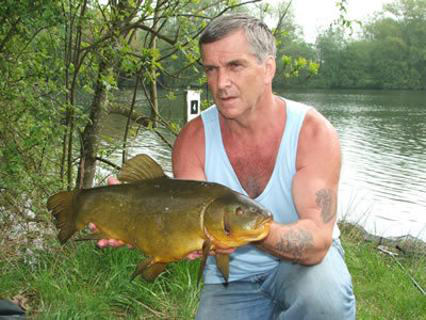

In [30]:
img

In [31]:
img.width, img.height 

(426, 320)

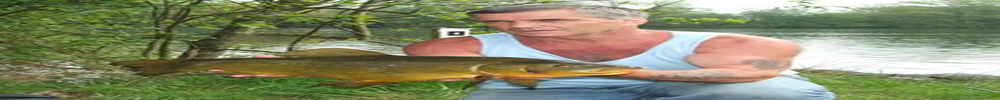

In [32]:
img.resize((1000,100),resample=Image.LANCZOS)

In [ ]:
img.save("hola.png")

In [2]:
directorio = "/home/mraggi/Downloads/imagenette-320/"
recursivo = True
extensiones = ["jpg"]

In [5]:
f = list(os.scandir(directorio))[0]

In [6]:
type(f)

posix.DirEntry

In [9]:
f.is_dir()

True

In [22]:
def obtener_archivos(directorio, recursivo = False, extensiones = None):
    resultado = []
    
    if type(extensiones) == str:
        extensiones = [extensiones]
    
    for f in os.scandir(directorio):
        if f.is_dir():
            if recursivo:
                resultado += obtener_archivos(f, recursivo, extensiones)
        else:
            f = Path(f)
            ext = extension(f)
            if extensiones is None or ext in extensiones:
                resultado.append(f)
    
    return resultado

In [24]:
obtener_archivos(directorio, True, extensiones='JPEG')

[PosixPath('/home/mraggi/Downloads/imagenette-320/train/n03394916/n03394916_55076.JPEG'),
 PosixPath('/home/mraggi/Downloads/imagenette-320/train/n03394916/n03394916_38203.JPEG'),
 PosixPath('/home/mraggi/Downloads/imagenette-320/train/n03394916/n03394916_41165.JPEG'),
 PosixPath('/home/mraggi/Downloads/imagenette-320/train/n03394916/n03394916_54247.JPEG'),
 PosixPath('/home/mraggi/Downloads/imagenette-320/train/n03394916/n03394916_29142.JPEG'),
 PosixPath('/home/mraggi/Downloads/imagenette-320/train/n03394916/n03394916_40655.JPEG'),
 PosixPath('/home/mraggi/Downloads/imagenette-320/train/n03394916/n03394916_11523.JPEG'),
 PosixPath('/home/mraggi/Downloads/imagenette-320/train/n03394916/n03394916_26802.JPEG'),
 PosixPath('/home/mraggi/Downloads/imagenette-320/train/n03394916/n03394916_62185.JPEG'),
 PosixPath('/home/mraggi/Downloads/imagenette-320/train/n03394916/n03394916_42175.JPEG'),
 PosixPath('/home/mraggi/Downloads/imagenette-320/train/n03394916/n03394916_3093.JPEG'),
 PosixPath(

In [33]:
directorio

'/home/mraggi/Downloads/imagenette-320/'

In [34]:
img_name = Path('/home/mraggi/Downloads/imagenette-320/train/n01440764/n01440764_10048.JPEG')

In [36]:
directorio

'/home/mraggi/Downloads/imagenette-320/'

In [35]:
img_name

PosixPath('/home/mraggi/Downloads/imagenette-320/train/n01440764/n01440764_10048.JPEG')

In [38]:
img_name.relative_to(directorio)

PosixPath('train/n01440764/n01440764_10048.JPEG')

In [39]:
img_name.stem

'n01440764_10048'

In [72]:
from tqdm import tqdm

In [73]:
def bajar_resolucion_a_todos(directorio, out_dir):
    out_dir = Path(out_dir)
    imagenes_nombres = obtener_archivos(directorio, recursivo=True, extensiones=["jpg","jpeg", "png", "JPG", "JPEG"])
    for img_name in tqdm(imagenes_nombres):
        img = Image.open(img_name)
        h, w = img.height, img.width
        img = img.resize((w//2,h//2),resample=Image.LANCZOS)
        
        out_name = out_dir/img_name.relative_to(directorio).parent/(img_name.stem + ".png")
        out_name.parent.mkdir(exist_ok=True,parents=True)
        
        img.save(out_name)

In [74]:
bajar_resolucion_a_todos(directorio, "/home/mraggi/tmp_imagenes_bobas")

 12%|█▏        | 3264/26348 [01:02<08:09, 47.14it/s]

KeyboardInterrupt: 

 12%|█▏        | 3264/26348 [01:20<08:09, 47.14it/s]

In [52]:
os.listdir("/home/mraggi/tmp_imagenes_bobas/train/n03394916")

['n03394916_35172.png',
 'n03394916_29130.png',
 'n03394916_36172.png',
 'n03394916_43255.png',
 'n03394916_52708.png',
 'n03394916_427.png',
 'n03394916_34947.png',
 'n03394916_44800.png',
 'n03394916_14349.png',
 'n03394916_36535.png',
 'n03394916_30036.png',
 'n03394916_38555.png',
 'n03394916_48881.png',
 'n03394916_4028.png',
 'n03394916_52276.png',
 'n03394916_35811.png',
 'n03394916_30918.png',
 'n03394916_23942.png',
 'n03394916_33687.png',
 'n03394916_46997.png',
 'n03394916_11523.png',
 'n03394916_37575.png',
 'n03394916_33006.png',
 'n03394916_36614.png',
 'n03394916_16274.png',
 'n03394916_3675.png',
 'n03394916_16288.png',
 'n03394916_50779.png',
 'n03394916_29106.png',
 'n03394916_29316.png',
 'n03394916_39153.png',
 'n03394916_51893.png',
 'n03394916_29247.png',
 'n03394916_68382.png',
 'n03394916_53962.png',
 'n03394916_292.png',
 'n03394916_29217.png',
 'n03394916_56527.png',
 'n03394916_31743.png',
 'n03394916_63965.png',
 'n03394916_28431.png',
 'n03394916_35292.png'

In [63]:
im1 = Image.open(Path(directorio)/"train/n03394916/n03394916_35172.JPEG")

In [64]:
im2 = Image.open("/home/mraggi/tmp_imagenes_bobas/train/n03394916/n03394916_35172.png")

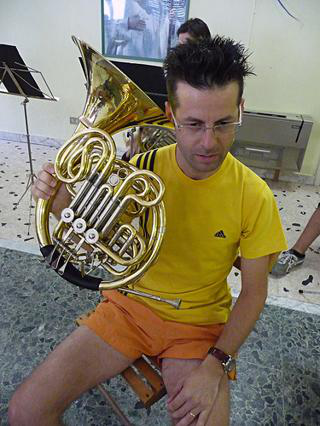

In [68]:
im1

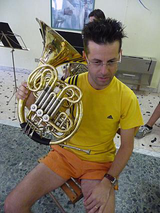

In [67]:
im2

In [ ]:
archivo.name.split('.')[-1]

In [ ]:
def extension(filename):
    return filename.name.split('.')[-1]

In [ ]:
def get_files(path, recursive=False, extensions = None):
    L = []
    for f in os.scandir(path):
        f = Path(f)
        if f.is_dir():
            if recursive:
                L += get_files(f,True,extensions)
        else:
            if extensions is None or extension(f) in extensions:
                L.append(f)
    return L

In [ ]:
get_files(directorio,recursive=False, extensions = ["txt"])

In [78]:
import subprocess

In [80]:
subprocess.run(["ls"],capture_output=True)

CompletedProcess(args=['ls'], returncode=0, stdout=b'00.Intro.ipynb\n01.VariablesPython.ipynb\n02.Listas.ipynb\n03.Ciclos.ipynb\n04.Funciones.ipynb\n05.EnumZip.ipynb\n06.Dicts.ipynb\n07.IntroASage.ipynb\n08.SAT.ipynb\n09.Busqueda.ipynb\n10.Busqueda2.ipynb\n11.OS.ipynb\n12.IntroAPytorch.ipynb\n15puzzle.ipynb\nBusquedaEnGrafos.pdf\nEjercicioPytorch.ipynb\nhola.jpg\nhola.png\nignore\nREADME.md\nSAT_ChromPetersen.ipynb\nSAT_Hamilton.ipynb\nSAT_Horario.ipynb\nSAT_Sudoku.ipynb\nSolRiemmann.ipynb\ntmp\nUntitled.ipynb\n', stderr=b'')

In [77]:
os.system("python --version")

0

In [ ]:
def replace_grotencio_by_renato(path):
    for filename in os.scandir(path):
        filename = Path(filename)
        if filename.name.split('.')[-1] != "txt": continue
        texto = ""
        with open(filename,mode='r') as f:
            texto = f.read()
            texto = texto.replace("Grotencio", "Renato")
        with open(filename,mode='w') as f:
            f.write(texto)

In [ ]:
replace_grotencio_by_renato(directorio)

In [ ]:
os.system("ls -l")